# Example 1. Authorizing an application to access Twitter account data

In [1]:
import twitter
# Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

CONSUMER_KEY = 'OYT3v8MByXqfVjdU49B64gQLB'
CONSUMER_SECRET ='QGFz5aa4CRXyVOWxgZQd2YxjcB5FjmK8y6QQkO39RdNbzOUJtG'
OAUTH_TOKEN = '571213367-016n5aGlN9TUNZ1dHvLBy55yKfM2PMFhSUmlE0Hf'
OAUTH_TOKEN_SECRET = '6gsjjbMrkGuJI9vvTXLcD2hhpmy2e1Cin0rmCpwJF81y6'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

# Example 2. Retrieving trends

In [2]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

for i in range(3):
    print(world_trends[0]['trends'][i]['query'])

%23MasterChefBR
%23PrisonBreak
%22Fede+Bal%22


In [3]:
for i in range(3):
    print(us_trends[0]['trends'][i]['query'])

%23InternetBands
%23WorldOfDance
%22Kathy+Griffin%22


# Example 3. Displaying API responses as pretty-printed JSON

In [4]:
import json

#print(json.dumps(world_trends, indent=1))
print(json.dumps(us_trends, indent=1))

[
 {
  "created_at": "2017-05-31T03:27:55Z",
  "trends": [
   {
    "query": "%23InternetBands",
    "promoted_content": null,
    "name": "#InternetBands",
    "url": "http://twitter.com/search?q=%23InternetBands",
    "tweet_volume": null
   },
   {
    "query": "%23WorldOfDance",
    "promoted_content": null,
    "name": "#WorldOfDance",
    "url": "http://twitter.com/search?q=%23WorldOfDance",
    "tweet_volume": 19819
   },
   {
    "query": "%22Kathy+Griffin%22",
    "promoted_content": null,
    "name": "Kathy Griffin",
    "url": "http://twitter.com/search?q=%22Kathy+Griffin%22",
    "tweet_volume": 453039
   },
   {
    "query": "%23SDLive",
    "promoted_content": null,
    "name": "#SDLive",
    "url": "http://twitter.com/search?q=%23SDLive",
    "tweet_volume": 66315
   },
   {
    "query": "%23PrisonBreak",
    "promoted_content": null,
    "name": "#PrisonBreak",
    "url": "http://twitter.com/search?q=%23PrisonBreak",
    "tweet_volume": 138215
   },
   {
    "query": "%

# Example 4. Computing the intersection of two sets of trends

In [5]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'#SDLive', 'Scott Pelley', '#PrisonBreak', '#WorldOfDance', '#PLLEndGame', 'Albert Pujols', 'Kathy Griffin', '#AGTPremiere', '#FearFactor', '#IfLovingYouIsWrong', 'Orlando International Airport', '#InternetBands'}


# Example 5. Collecting search results

In [6]:
#  Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.
import json

q = '#Kanye' 

count = 1000

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses, indent=4))


Length of statuses 100
Length of statuses 200
Length of statuses 200
[
    {
        "user": {
            "profile_use_background_image": true,
            "description": "19 \u2022 You never know unless you try",
            "profile_background_image_url": null,
            "screen_name": "fowlerbrock1",
            "profile_sidebar_border_color": "C0DEED",
            "time_zone": null,
            "created_at": "Sat Oct 22 21:34:08 +0000 2016",
            "profile_text_color": "333333",
            "followers_count": 56,
            "favourites_count": 2533,
            "has_extended_profile": true,
            "profile_image_url": "http://pbs.twimg.com/profile_images/846451645693284352/F6Lkepbn_normal.jpg",
            "id_str": "789942939740934148",
            "follow_request_sent": false,
            "lang": "en",
            "name": "Brock Fowler",
            "friends_count": 95,
            "profile_link_color": "1DA1F2",
            "location": "Calhoun, GA",
            "

# Example 6. Extracting text, screen names, and hashtags from tweets

In [7]:
import time


status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1))
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "RT @JakeThePowerful: Man it's so hard not to act reckless #Kanye",
 "https://t.co/vOH0BOBwQm #cartier #italy #mia #saks #atl #atlanta #peachtree #lenox #nyc #lax #chi #thechi #toronto #kanye #drake #yeezys #la",
 "#KathyGriffin lives next to #Kanye and #KKW in Bel-air. Coincidence? I think not #kanye2020",
 "letterpress HASKELL AVENUE AND GASTON AVENUE @ 12:30AM #hipster #kanye",
 "Hey @vinylz come get your shoes lol #kaws #yeezy #complexkicks #handpainted #angelusdirect #kanye https://t.co/I9XdkzCXHM"
]
[
 "JakeThePowerful",
 "Vinylz",
 "FremantleMedia",
 "AmericanIdol",
 "SweetTeaLovesU"
]
[
 "Kanye",
 "cartier",
 "italy",
 "mia",
 "saks"
]
[
 "RT",
 "@JakeThePowerful:",
 "Man",
 "it's",
 "so"
]


# Example 7. Creating a basic frequency distribution from the words in tweets

In [8]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10

[('#kanye', 106), ('#Kanye', 51), ('RT', 51), ('#hipster', 43), ('the', 36), ('and', 27), ('to', 27), ("#Kanye's", 25), ('on', 23), ('we', 18)]
[('TMZ', 12), ('AmericanIdol', 5), ('FremantleMedia', 4), ('adidas', 3), ('amjustfree', 3), ('liyareyess', 3), ('KimKardashian', 2), ('jimbob_21', 2), ('chrisdferrer', 2), ('Che1ique', 2)]
[('kanye', 111), ('Kanye', 86), ('hipster', 43), ('TMZ', 13), ('yeezy', 10), ('KanyeWest', 7), ('west', 6), ('celebrities', 6), ('fashion', 6), ('qotd', 6)]


# Example 8. Using prettytable to display tuples in a nice tabular format

In [9]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+----------+-------+
| Word     | Count |
+----------+-------+
| #kanye   |   106 |
| #Kanye   |    51 |
| RT       |    51 |
| #hipster |    43 |
| the      |    36 |
| and      |    27 |
| to       |    27 |
| #Kanye's |    25 |
| on       |    23 |
| we       |    18 |
+----------+-------+
+----------------+-------+
| Screen Name    | Count |
+----------------+-------+
| TMZ            |    12 |
| AmericanIdol   |     5 |
| FremantleMedia |     4 |
| adidas         |     3 |
| amjustfree     |     3 |
| liyareyess     |     3 |
| KimKardashian  |     2 |
| jimbob_21      |     2 |
| chrisdferrer   |     2 |
| Che1ique       |     2 |
+----------------+-------+
+-------------+-------+
| Hashtag     | Count |
+-------------+-------+
| kanye       |   111 |
| Kanye       |    86 |
| hipster     |    43 |
| TMZ         |    13 |
| yeezy       |    10 |
| KanyeWest   |     7 |
| west        |     6 |
| celebrities |     6 |
| fashion     |     6 |
| qotd        |     6 |
+-------------+-

# Example 9. Calculating lexical diversity for tweets

In [10]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.47706422018348627
0.6363636363636364
0.4600262123197903
14.17


# Example 10. Finding the most popular retweets

In [11]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+-------------+----------------------------------------------------+
| Count | Screen Name | Text                                               |
+-------+-------------+----------------------------------------------------+
| 50    | izqomar     | RT @izqomar: The 1 Kanye swimmer to the other      |
|       |             | 999,999,999: “Ima let y’all finish, but I was the  |
|       |             | greatest swimmer of ALL TIME!” #Kanye              |
| 38    | TMZ         | RT @TMZ: #Kanye's got something WEIRD on his       |
|       |             | face...and we don't see it very often! #TMZ        |
|       |             | https://t.co/5mQRBLyl8g                            |
| 38    | TMZ         | RT @TMZ: #Kanye's got something WEIRD on his       |
|       |             | face...and we don't see it very often! #TMZ        |
|       |             | https://t.co/5mQRBLyl8g                            |
| 38    | TMZ         | RT @TMZ: #Kanye's got something WEIRD on his       |

#  Example 11. Plotting frequencies of words

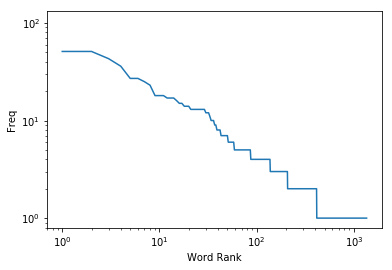

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  


word_counts = sorted(Counter(words).values(), reverse=True)



plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")